In [17]:
import xarray as xr
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

### Read in NDVI data

In [18]:
ds=xr.open_mfdataset(
    '/g/data/oe9/user/rg6346/VI_mask_nc/NDVI/NDVI_????.nc',
    chunks=dict(long=176)) 
ds=ds.rename({'ndvi_evi':'ndvi'})
ds=ds.drop('band')
ds['ndvi']=ds.ndvi/10000;
ds

<xarray.Dataset>
Dimensions:  (lat: 3147, long: 3344, time: 388)
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Data variables:
    ndvi     (time, lat, long) float64 dask.array<shape=(388, 3147, 3344), chunksize=(20, 3147, 176)>

## Subset data for testing

In [19]:
sub=ds.sel(lat=slice(-30.1, -31),long=slice(148.9,150.6)) ##yarrie
sub.load()

<xarray.Dataset>
Dimensions:  (lat: 216, long: 408, time: 388)
Coordinates:
  * lat      (lat) float64 -30.1 -30.11 -30.11 -30.11 -30.12 -30.12 -30.13 ...
  * long     (long) float64 148.9 148.9 148.9 148.9 148.9 148.9 148.9 148.9 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Data variables:
    ndvi     (time, lat, long) float64 0.3499 0.3152 0.2693 0.2616 0.2476 ...

### Resample to quarterly, extract seasons

In [20]:
ndvi_q=sub.ndvi.resample(time='Q-FEB').mean(dim='time')
ndvi_jja=ndvi_q.where(ndvi_q['time.season']=='JJA',drop=True)
ndvi_djf=ndvi_q.where(ndvi_q['time.season']=='DJF',drop=True)


/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)
/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):
/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


In [21]:
##Calculate and plot seasonal variance
ndvi_jja_std=ndvi_jja.std(dim='time')
ndvi_djf_std=ndvi_djf.std(dim='time')


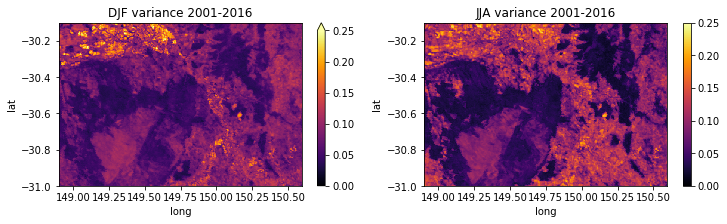

In [22]:
cmap='inferno'
vmin=0
vmax=.25
fig=plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
ndvi_djf_std.plot(cmap=cmap,vmin=vmin, vmax=vmax)
plt.title('DJF variance 2001-2016')
plt.subplot(1,2,2)
ndvi_jja_std.plot(cmap=cmap,vmin=vmin, vmax=vmax)
plt.title('JJA variance 2001-2016')
path='/home/156/jbw156/team-drip/figures/seasonalvariance.pdf'
plt.savefig(path,dpi=300,bbox_inches='tight')